In [1]:
import numpy as np
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
    

import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator  
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# importing dataset
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# Set the target size to 31 by 31 pixels
target_size = (31, 31)

train_set = train_datagen.flow_from_directory(
    'Dataset for CA1 part A/train/',
    target_size=target_size,
    batch_size=9028,
    class_mode='categorical',
    color_mode='grayscale'  # Ensure grayscale color mode
)

test_set = train_datagen.flow_from_directory(
    'Dataset for CA1 part A/test/',
    target_size=target_size,
    batch_size=3000,
    class_mode='categorical',
    color_mode='grayscale'
)

val_set = train_datagen.flow_from_directory(
    'Dataset for CA1 part A/validation/',
    target_size=target_size,
    batch_size=3000,
    class_mode='categorical',
    color_mode='grayscale'
)



Found 9028 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [3]:
import cv2
X_train, y_train = train_set.next()
X_test, y_test = test_set.next()
X_val, y_val = val_set.next()

seed = 1
np.random.seed(seed)
num_classes = y_test.shape[1]

In [4]:
class_labels = train_set.class_indices

# Create a list of class names based on the dictionary keys
class_names = list(class_labels.keys())

# Create a list of class labels based on the dictionary values
class_labels_list = list(class_labels.values())

# Create a dictionary to map class labels to class names
labels = {class_label: class_name for class_label, class_name in zip(class_labels_list, class_names)}

# Print the dictionary mapping class labels to class names
print("Label to class name dictionary:")
print(labels)

Label to class name dictionary:
{0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}


Class 0: 780 samples
Class 1: 720 samples
Class 2: 441 samples
Class 3: 868 samples
Class 4: 750 samples
Class 5: 503 samples
Class 6: 351 samples
Class 7: 256 samples
Class 8: 587 samples
Class 9: 812 samples
Class 10: 566 samples
Class 11: 377 samples
Class 12: 814 samples
Class 13: 248 samples
Class 14: 955 samples


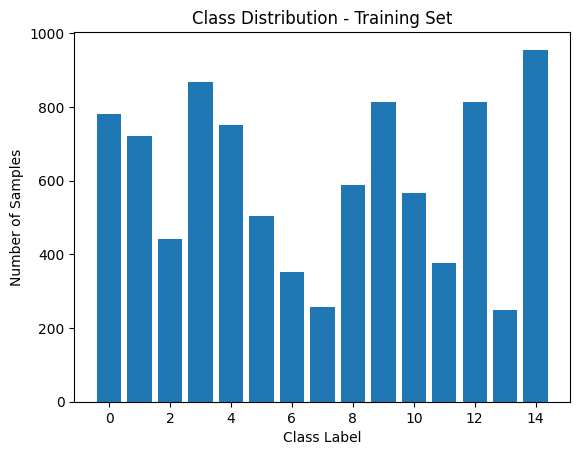

In [5]:
# EDA 
# Class distribution
# Get class distribution for the training set
train_class_distribution = train_set.classes

# Get unique class labels and their counts
unique_classes, counts = np.unique(train_class_distribution, return_counts=True)

# Print or visualize the class distribution
for label, count in zip(unique_classes, counts):
    print(f"Class {label}: {count} samples")

# Visualize class distribution using a bar plot
plt.bar(unique_classes, counts)
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution - Training Set')
plt.show()


In [7]:
# Get class distribution for the test set
print("Test class distribution")
test_class_distribution = test_set.classes

# Get unique class labels and their counts
unique_classes_test, counts_test = np.unique(test_class_distribution, return_counts=True)

# Print or visualize the class distribution for the test set
for label, count in zip(unique_classes_test, counts_test):
    print(f"Class {label}: {count} samples")

# Visualize class distribution using a bar plot for the test set

print("Validation class distribution")
# Get class distribution for the validation set
val_class_distribution = val_set.classes

# Get unique class labels and their counts
unique_classes_val, counts_val = np.unique(val_class_distribution, return_counts=True)

# Print or visualize the class distribution for the validation set
for label, count in zip(unique_classes_val, counts_val):
    print(f"Class {label}: {count} samples")

# Visualize class distribution using a bar plot for the validation set


Test class distribution
Class 0: 200 samples
Class 1: 200 samples
Class 2: 200 samples
Class 3: 200 samples
Class 4: 200 samples
Class 5: 200 samples
Class 6: 200 samples
Class 7: 200 samples
Class 8: 200 samples
Class 9: 200 samples
Class 10: 200 samples
Class 11: 200 samples
Class 12: 200 samples
Class 13: 200 samples
Class 14: 200 samples
Validation class distribution
Class 0: 200 samples
Class 1: 200 samples
Class 2: 200 samples
Class 3: 200 samples
Class 4: 200 samples
Class 5: 200 samples
Class 6: 200 samples
Class 7: 200 samples
Class 8: 200 samples
Class 9: 200 samples
Class 10: 200 samples
Class 11: 200 samples
Class 12: 200 samples
Class 13: 200 samples
Class 14: 200 samples


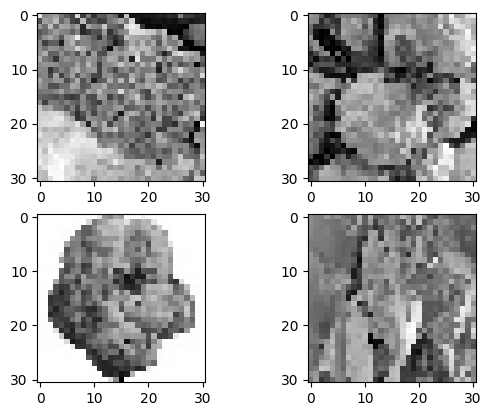

In [62]:
plt.subplot(221)

plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


In [9]:
# Deal with class imbalance
from sklearn.utils.class_weight import compute_class_weight

actual_class_labels_train = train_set.classes

# Calculate class weights for the training set
class_labels_train = np.unique(actual_class_labels_train)
class_weights_train = compute_class_weight(class_weight='balanced', classes=class_labels_train, y=actual_class_labels_train)

# Convert class weights to a dictionary
class_weight_dict_train = dict(zip(class_labels_train, class_weights_train))
print(class_weight_dict_train)

{0: 0.7716239316239316, 1: 0.835925925925926, 2: 1.3647770219198792, 3: 0.693394777265745, 4: 0.8024888888888889, 5: 1.1965540092776674, 6: 1.7147198480531813, 7: 2.3510416666666667, 8: 1.0253265190232823, 9: 0.7412151067323481, 10: 1.0633686690223794, 11: 1.5964633068081344, 12: 0.7393939393939394, 13: 2.4268817204301074, 14: 0.6302268760907505}


In [10]:
# Function
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'],loc='upper right')
    plt.show()
    
def plot_acc(acc,val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.show()

In [21]:
# Model training 
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(31, 31, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy',
 optimizer='adam', metrics=['accuracy'])

In [22]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience = 5)
model_save = ModelCheckpoint('testmodel_1.h5', save_best_only=True, save_weights_only=True)
h_callback= model.fit(X_train,y_train,epochs=100, validation_data=(X_val, y_val),class_weight=class_weight_dict_train,#,
         callbacks = [model_save,early_stopping])

Epoch 1/100
283/283 [==============================] - 2s 5ms/step - loss: 2.4322 - accuracy: 0.2347 - val_loss: 2.1091 - val_accuracy: 0.3653
Epoch 2/100
283/283 [==============================] - 1s 4ms/step - loss: 1.8670 - accuracy: 0.4401 - val_loss: 1.6881 - val_accuracy: 0.4757
Epoch 3/100
283/283 [==============================] - 1s 5ms/step - loss: 1.5446 - accuracy: 0.5286 - val_loss: 1.4911 - val_accuracy: 0.5437
Epoch 4/100
283/283 [==============================] - 1s 5ms/step - loss: 1.3048 - accuracy: 0.5975 - val_loss: 1.3348 - val_accuracy: 0.6017
Epoch 5/100
283/283 [==============================] - 2s 5ms/step - loss: 1.1358 - accuracy: 0.6488 - val_loss: 1.3079 - val_accuracy: 0.6030
Epoch 6/100
283/283 [==============================] - 1s 4ms/step - loss: 0.9888 - accuracy: 0.6909 - val_loss: 1.3070 - val_accuracy: 0.6047
Epoch 7/100
283/283 [==============================] - 1s 5ms/step - loss: 0.8653 - accuracy: 0.7284 - val_loss: 1.1789 - val_accuracy: 0.6503

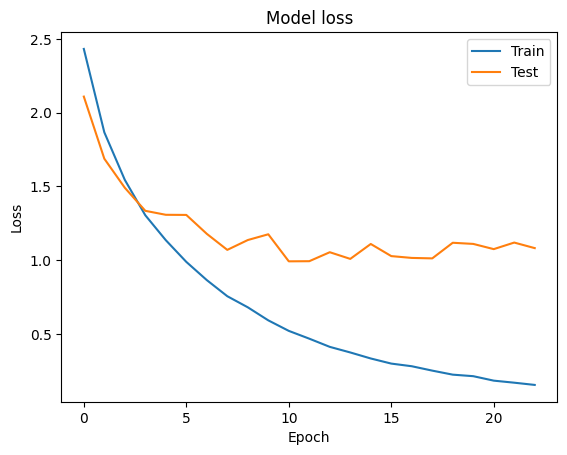

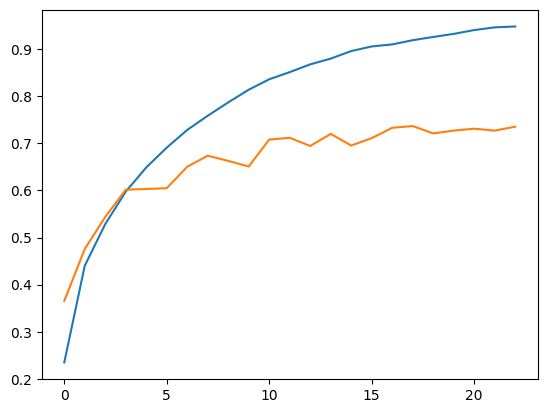

CNN Error: 25.37%


In [23]:
plot_loss(h_callback.history['loss'],h_callback.history['val_loss'])
plot_acc(h_callback.history['accuracy'],h_callback.history['val_accuracy'])
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))


In [26]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(31, 31, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(5000, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
 optimizer='adam', metrics=['accuracy'])

In [27]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience = 5)
model_save = ModelCheckpoint('testmodel_2.h5', save_best_only=True, save_weights_only=True)
h_callback= model.fit(X_train,y_train,epochs=100, validation_data=(X_val, y_val),class_weight=class_weight_dict_train,#,
         callbacks = [model_save,early_stopping])

Epoch 1/100
283/283 [==============================] - 3s 9ms/step - loss: 2.5300 - accuracy: 0.1657 - val_loss: 2.1813 - val_accuracy: 0.2957
Epoch 2/100
283/283 [==============================] - 2s 9ms/step - loss: 1.9353 - accuracy: 0.3839 - val_loss: 1.5502 - val_accuracy: 0.5007
Epoch 3/100
283/283 [==============================] - 3s 9ms/step - loss: 1.4047 - accuracy: 0.5384 - val_loss: 1.2999 - val_accuracy: 0.5880
Epoch 4/100
283/283 [==============================] - 2s 8ms/step - loss: 1.0533 - accuracy: 0.6488 - val_loss: 0.9356 - val_accuracy: 0.7050
Epoch 5/100
283/283 [==============================] - 2s 9ms/step - loss: 0.7795 - accuracy: 0.7446 - val_loss: 0.8296 - val_accuracy: 0.7393
Epoch 6/100
283/283 [==============================] - 2s 9ms/step - loss: 0.5721 - accuracy: 0.8083 - val_loss: 0.6419 - val_accuracy: 0.8087
Epoch 7/100
283/283 [==============================] - 3s 9ms/step - loss: 0.4123 - accuracy: 0.8574 - val_loss: 0.6054 - val_accuracy: 0.8177

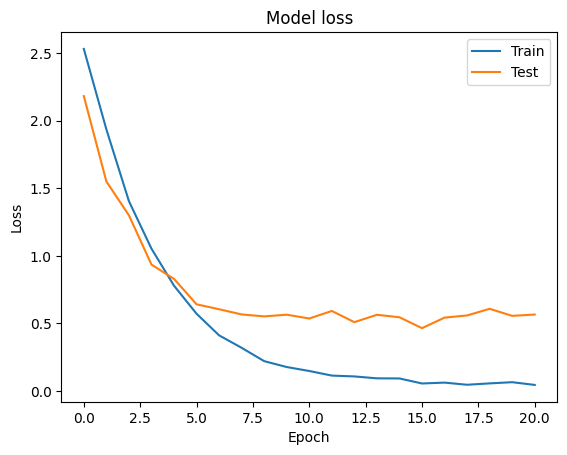

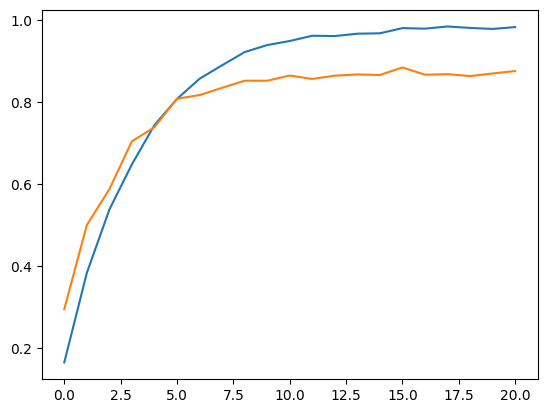

CNN Error: 11.63%


In [29]:
plot_loss(h_callback.history['loss'],h_callback.history['val_loss'])
plot_acc(h_callback.history['accuracy'],h_callback.history['val_accuracy'])
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))


In [30]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(31, 31, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(5000, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
 optimizer='adam', metrics=['accuracy'])

In [31]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience = 5)
model_save = ModelCheckpoint('testmodel_3.h5', save_best_only=True, save_weights_only=True)
h_callback= model.fit(X_train,y_train,epochs=100, validation_data=(X_val, y_val),class_weight=class_weight_dict_train,#,
         callbacks = [model_save,early_stopping])

Epoch 1/100
283/283 [==============================] - 3s 8ms/step - loss: 2.6009 - accuracy: 0.1128 - val_loss: 2.4541 - val_accuracy: 0.1867
Epoch 2/100
283/283 [==============================] - 2s 6ms/step - loss: 2.3684 - accuracy: 0.1887 - val_loss: 2.2303 - val_accuracy: 0.2573
Epoch 3/100
283/283 [==============================] - 2s 6ms/step - loss: 2.0472 - accuracy: 0.3136 - val_loss: 1.7949 - val_accuracy: 0.4260
Epoch 4/100
283/283 [==============================] - 2s 6ms/step - loss: 1.7284 - accuracy: 0.4196 - val_loss: 1.4568 - val_accuracy: 0.5260
Epoch 5/100
283/283 [==============================] - 2s 7ms/step - loss: 1.5092 - accuracy: 0.4901 - val_loss: 1.2951 - val_accuracy: 0.5850
Epoch 6/100
283/283 [==============================] - 2s 6ms/step - loss: 1.3132 - accuracy: 0.5570 - val_loss: 1.0783 - val_accuracy: 0.6590
Epoch 7/100
283/283 [==============================] - 2s 6ms/step - loss: 1.1730 - accuracy: 0.6113 - val_loss: 0.9473 - val_accuracy: 0.6880

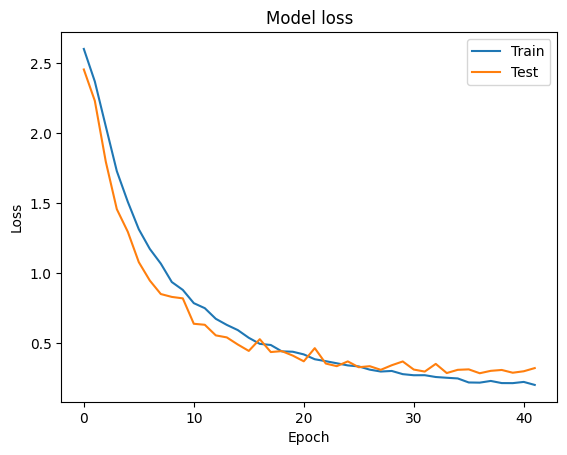

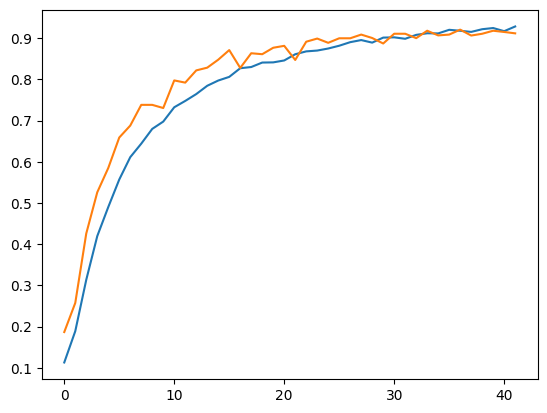

CNN Error: 11.23%


In [37]:
plot_loss(h_callback.history['loss'],h_callback.history['val_loss'])
plot_acc(h_callback.history['accuracy'],h_callback.history['val_accuracy'])
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))


In [44]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(31, 31, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(5000, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lr_scheduler = ExponentialDecay(
    initial_learning_rate = 0.001,
    decay_rate = 0.8,
    decay_steps = 700)
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=lr_scheduler), metrics=['accuracy'])

In [45]:
model_save = ModelCheckpoint('bestmodel_1.h5', save_best_only=True, save_weights_only=True)
h_callback= model.fit(X_train,y_train,epochs=100, validation_data=(X_val, y_val),class_weight=class_weight_dict_train,#,
         callbacks = [model_save])

Epoch 1/100
283/283 [==============================] - 6s 19ms/step - loss: 2.6855 - accuracy: 0.0789 - val_loss: 2.5572 - val_accuracy: 0.1327
Epoch 2/100
283/283 [==============================] - 3s 12ms/step - loss: 2.4262 - accuracy: 0.1639 - val_loss: 2.2929 - val_accuracy: 0.2253
Epoch 3/100
283/283 [==============================] - 3s 12ms/step - loss: 2.1875 - accuracy: 0.2576 - val_loss: 2.1112 - val_accuracy: 0.2700
Epoch 4/100
283/283 [==============================] - 3s 12ms/step - loss: 1.8688 - accuracy: 0.3767 - val_loss: 1.7091 - val_accuracy: 0.4550
Epoch 5/100
283/283 [==============================] - 3s 11ms/step - loss: 1.5790 - accuracy: 0.4786 - val_loss: 1.3949 - val_accuracy: 0.5420
Epoch 6/100
283/283 [==============================] - 3s 12ms/step - loss: 1.3794 - accuracy: 0.5409 - val_loss: 1.2496 - val_accuracy: 0.5937
Epoch 7/100
283/283 [==============================] - 3s 12ms/step - loss: 1.1995 - accuracy: 0.5947 - val_loss: 1.0719 - val_accuracy:

In [40]:
model.load_weights('bestmodel_1.h5')


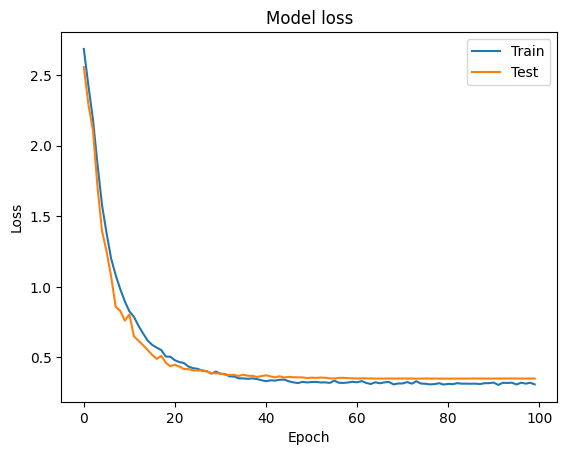

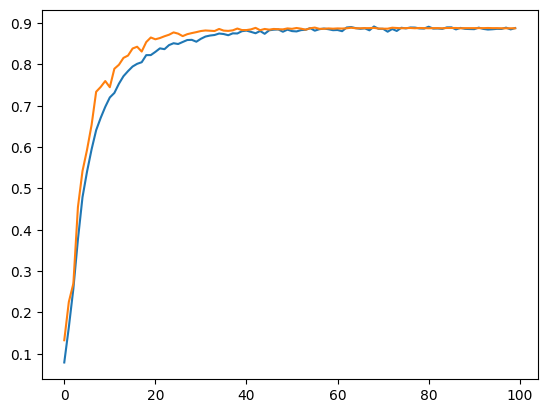

In [46]:
plot_loss(h_callback.history['loss'],h_callback.history['val_loss'])
plot_acc(h_callback.history['accuracy'],h_callback.history['val_accuracy'])

In [47]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 9.70%


In [48]:
# Classification report
from sklearn.metrics import classification_report
y_pred = model.predict(X_val)

# Convert one-hot encoded predictions to class labels (if needed)
y_pred_classes = np.argmax(y_pred, axis=1)

# Assuming y_val is one-hot encoded, you might want to convert it to class labels as well
y_val_classes = np.argmax(y_val, axis=1)

# Generate a classification report
print(classification_report(y_val_classes, y_pred_classes))

94/94 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.88      0.80      0.83       200
           1       0.91      0.94      0.93       200
           2       0.98      0.94      0.96       200
           3       0.91      0.87      0.89       200
           4       0.86      0.89      0.87       200
           5       0.82      0.84      0.83       200
           6       0.89      0.90      0.89       200
           7       0.93      0.96      0.94       200
           8       0.86      0.88      0.87       200
           9       0.87      0.90      0.88       200
          10       0.90      0.93      0.91       200
          11       0.86      0.94      0.90       200
          12       0.89      0.89      0.89       200
          13       0.93      0.85      0.89       200
          14       0.85      0.81      0.83       200

    accuracy                           0.89      3000
   macro avg       0.89    